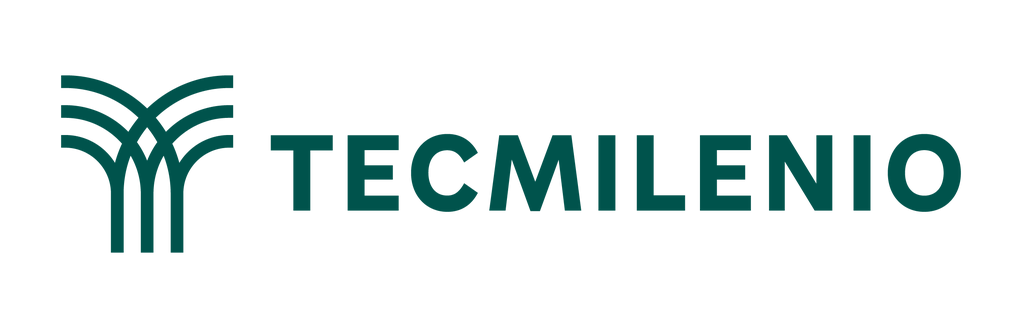

La toma de decisiones es un paso importante para una empresa ya que permite dirigir el camino que va a llevar la empresa, tanto como la optimización, adaptación, logro de objetivos, etc.

En este documento muestro información de una empresa ficticia donde mi variable principal son las unidades vendidas por modelo en un solo día.
Más adelante muestro mis procedimientos y mis resultados finales.

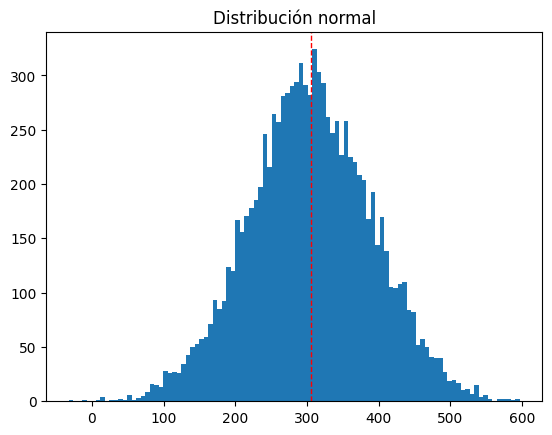

In [16]:
#Distribución normal
import numpy as np
import matplotlib.pyplot as plt
ventas_diarias_por_modelo = [250, 320, 180, 450, 210, 380, 290, 410, 190, 350, 280, 310, 170, 420, 230, 390, 300, 430, 200, 360, 270, 330, 160, 440, 240, 400, 220, 370, 260, 340]
mean = np.mean(ventas_diarias_por_modelo)
standard_deviation = np.std(ventas_diarias_por_modelo)
size= 10000
values = np.random.normal(mean, standard_deviation, size)
plt.title("Distribución normal")
plt.hist(values, 100)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)
plt.show()

La distribución normal sirve para conocer la probabilidad de que caiga un conjunto de muestras en un rango y quiere demostrar que los datos más cercanos a la media ocurren con mayor frecuencia que los más alejados a ella. En este caso establecí la variable de ventas por día. Luego consigo la media y la desviación estandar usando la librería de numpy, después definí cuantas valores de la muestra se iba a tomar y arreglé la tabla para poder mostrar los resultados.
Viendo la tabla que muestra y los resultados podemos ver que efectivamente sigue una distribución normal la muestra.

In [22]:
#Estimación y cálculo de intervalos de confianza.
import numpy as np
import scipy.stats as stats
ventas = [250, 320, 180, 450, 210, 380, 290, 410, 190, 350, 280, 310, 170, 420, 230, 390, 300, 430, 200, 360, 270, 330, 160, 440, 240, 400, 220, 370, 260, 340]
muestra = [250, 320, 180, 450, 430, 200, 360, 410, 190, 350]
#Estimación puntual
media_poblacional = np.mean(ventas)
media_muestral = np.mean(muestra)
print("Media poblacional", media_poblacional)
print("Media muestral", media_muestral)
#Intervalo de confianza
nivel_confianza = 0.95
valor_critico = stats.norm.ppf((1 + nivel_confianza) / 2)
error_estandar = stats.sem(ventas)
margen_error = valor_critico * error_estandar
limite_inferior = media_poblacional - margen_error
limite_superior = media_poblacional + margen_error
print("Límite inferior:", limite_inferior)
print("Límite superior:", limite_superior)

Media poblacional 305.0
Media muestral 314.0
Límite inferior: 273.4979863816192
Límite superior: 336.5020136183808


Empecemos con la estimación puntual, la estimación puntual busca obtener una media poblacional utilizando solo una muestra de la población. Comunmente se usa cuando la población es muy grande para obtener datos de cada individuo, entonces mediante muestreo se consigue una muestra poblacional y a partir de ahí se consiguen los datos que se busca solicitar. En este caso quería comprobar que mediante una muestra que equivale al 33.333...% de la población total, la media se encuentra dentro de valores cercanos a cada una.

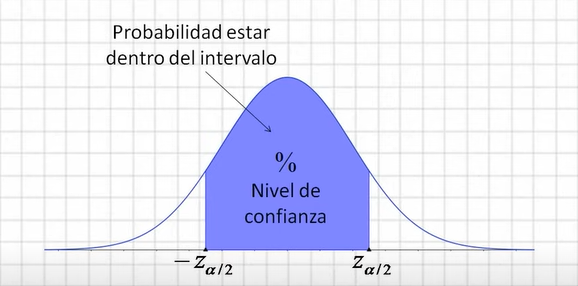

El intervalo de confianza es la probabilidad de encontrarse dentro del intervalo donde existe un limite superior y un limite inferior, donde el centro es la media de la población. Se busca conocer los limites que engloben al porcentaje de la población que equivalga al nivel de confianza.

En este caso como ya tenemos la media poblacional calculada, vamos a realizar los demás pasos.

Primero calculamos el valor critico que representa las desviaciones estandar que engloban el nivel de confianza. Luego consigo el error estandar que busca ver cuánto se alejan los valores de la media poblacional.

Luego con estos datos calculamos el margen de error que representa el rango de la población total, o sea cuanto la media de la muestra puede variar.

Después calculamos el intervalo superior e inferior, sumando o restando la media poblacional con el margen de error.

Después de todo podemos ver el intervalo donde se encuentra el 95% de la población.



In [40]:
#Prueba de hipotesis
import numpy as np
import scipy.stats as stats
ventas_actuales = [102, 120, 105, 100, 145, 160, 221, 200, 175, 210, 205, 240, 225, 260, 185, 280, 210, 350, 270, 350, 205, 340, 345, 370, 345, 380, 345, 410, 305, 434]
promedio_anterior_mes = 200
estadistica_t, valor = stats.ttest_1samp(ventas_actuales, promedio_anterior_mes)
print("estadistica p", estadistica_t)
print("valor:", valor)
alpha = 0.05
if valor < alpha:
    print("Existe un cambio significativo")
else:
    print("No existe cambio significativo")

estadistica p 2.997393422561679
valor: 0.005535069832162697
Existe un cambio significativo


En esta parte voy a utilizar las ventas durante un mes que se realizó de un solo modelo y voy a realizar dos hipotesis para comparar el promedio de ventas de este mes con el anterior mes.

Hipotesis nula: El promedio de ventas del anterior mes no ha cambiado significativamente

Hipotesis alternativa: El promedio ha cambiado significativamente

En mi procedimiento utilizo una función que me permite calcular la prueba de mi hipotesis nula para ambos grupos.

"estadistica_t" me permite medir la diferencia entre la media de las ventas actuales con las del anterior mes.

"valor" es la probabilidad de que mi hipotesis nula sea verdad

"alpha" representa el limite de rechazar la hipotesis nula.

Al final realizo una comparación de mis dos medias y muestra que hay un cambio significativo en ambas medias.



In [30]:
#Análisis de desviaciones estándar
import numpy as np
import math
ventas = [250, 320, 180, 450, 210, 380, 290, 410, 190, 350, 280, 310, 170, 420, 230, 390, 300, 430, 200, 360, 270, 330, 160, 440, 240, 400, 220, 370, 260, 340]
confidence_level = 0.95
n = len(ventas)
desviacion_estandr = np.std(ventas)
media_poblacional = np.mean(ventas)
valor_critico = stats.norm.ppf((1 + confidence_level) / 2)
lim_superior = media_poblacional + valor_critico * (desviacion_estandr / math.sqrt(n))
lim_inferior = media_poblacional - valor_critico * (desviacion_estandr / math.sqrt(n))
print("El intervalo de confianza es:",lim_inferior, lim_superior)

El intervalo de confianza es: 274.0274696984748 335.9725303015252


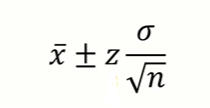

En este caso es el mismo tema del intervalo de confianza, pero aquí conocemos la desviación estandar de la muestra, entonces se utiliza otra formula para poder realizarlo donde x es la media, z es el valor critico o es la desviación estandar y n es el número de individuos que tenemos.


In [32]:
#Análisis ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
ventas = [250, 320, 180, 450, 210, 380, 290, 410, 190, 350, 280, 310, 170, 420, 230, 390, 300, 430, 200, 360, 270, 330, 160, 440, 240, 400, 220, 370, 260, 340]
atencion_cliente = [5, 87, 32, 9, 68, 25, 49, 76, 12, 91, 3, 56, 82, 17, 43, 79, 15, 51, 88, 21, 6, 53, 78, 14, 40, 75, 11, 58, 84, 90]
datos = pd.DataFrame({'ventas': ventas, 'atencion_cliente': atencion_cliente})
modelo = ols('ventas ~ atencion_cliente', data=datos).fit()
tabla_anova = sm.stats.anova_lm(modelo)
print(tabla_anova)

                    df        sum_sq      mean_sq         F    PR(>F)
atencion_cliente   1.0     925.44007   925.440070  0.115771  0.736207
Residual          28.0  223824.55993  7993.734283       NaN       NaN


El analisis ANOVA busca evaluar si existen diferencias significativas entre dos o más grupos.

Lo que hice fue crear mis dos grupos y luego establecer mi DataFrame para poder crear la tabla ANOVA y que la librería de statsmodels pueda mostrarme mis resultados

In [4]:
#Correlación y regresión lineal.
import pandas as pd
from statsmodels.formula.api import ols
ventas = [250, 320, 180, 450, 210, 380, 290, 410, 190, 350, 280, 310, 170, 420, 230, 390, 300, 430, 200, 360, 270, 330, 160, 440, 240, 400, 220, 370, 260, 340]
materia_prima = [100, 150, 80, 200, 120, 180, 140, 130, 90, 160, 130, 100, 70, 190, 110, 170, 150, 120, 100, 170, 120, 80, 80, 220, 120, 190, 110, 180, 130, 160]
datos = pd.DataFrame({'ventas': ventas, 'materia prima': materia_prima})
correlacion = datos['ventas'].corr(datos['materia prima'])
print("Correlación entre ventas y materia:", correlacion)
modelo = ols('ventas ~ materia_prima', data=datos).fit()
gasto_prediccion = 15
ventas_predichas = modelo.predict(pd.DataFrame({'materia_prima': [gasto_prediccion]}))
print("Ventas predichas para un gasto de materia prima de", gasto_prediccion, ":", ventas_predichas[0])


Correlación entre ventas y materia: 0.812379007758344
Ventas predichas para un gasto de materia prima de 15 : 91.70926517571888


La correlación es cuando dos variables están relacionadas la una con la otra, es decir; si una aumenta, la otra aumenta, y si una disminuye de valor la otra disminuye también.
En este caso estamos viendo la relación que existe entre las ventas diarias por modelo y los gastos de materia prima para producción de dichos modelos.

Primero establezco las dos variables que voy a analizar. Luego creo mi DataFrame con ambas variables, después utilizo una función de la librería de pandas para poder realizar la correlación. Luego utilizo ols (Ordinary Least Squares) de la librería de statsmodels.api que viene siendo la regresión lineal para poder predecir las ventas.
Con eso creé un modelo que más adelante puedo usar para hacer la predicción usando el modelo y mi DataFrame

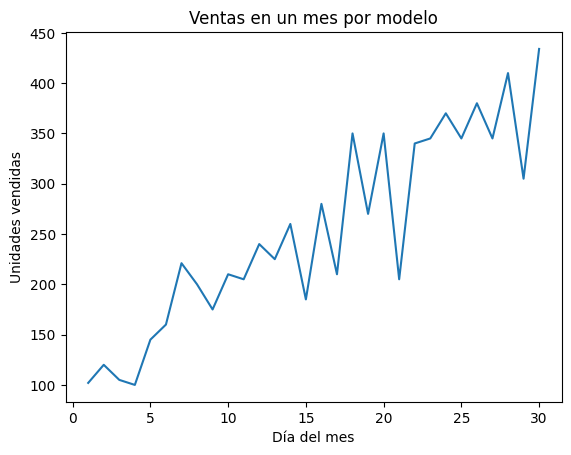

In [34]:
#Análisis de series de tiempo.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

ventas = [102, 120, 105, 100, 145, 160, 221, 200, 175, 210, 205, 240, 225, 260, 185, 280, 210, 350, 270, 350, 205, 340, 345, 370, 345, 380, 345, 410, 305, 434]
dias = range(1, 31)
datos = pd.DataFrame({'Ventas': ventas}, index=dias)
datos['Ventas'].plot(title='Ventas en un mes por modelo', xlabel='Día del mes', ylabel='Unidades vendidas')
plt.show()


El analisis de series de tiempo sirve para analizar datos cronologicamente para identificar patrones o tendencias. Es importante para analizar los datos a través del tiempo.

En mi codigo muestro la tendencia lineal de ventas de un solo modelo cada día del mes. Analizando la gráfica podemos ver que existe una tendencia ascendente en el modelo, por lo que se puede predecir que van a seguir aumentando las ventas del producto durante los siguientes meses, así se puede aumentar la producción del mismo modelo.